# Analytic approx. for filters

The aim here is to derive analytic formulae for products of the filtering, given $W(kR)$ models and (very) simple $P(k)$. These will be useful for basic testing (against known analytic solution), but also, if $P(k)$ can be set close enough to reasonable models, for checking appropriate resolution/limits for integration.

Our main targets will be the mass variance:

$$ \sigma^2_n(r) = \frac{1}{2\pi^2} \int_0^\infty dk\ k^{2(1+n)} P(k) W^2(kR), $$

and the log derivative:

$$ \frac{d\ln \sigma^2}{d\ln R} = \frac{1}{\pi^2\sigma^2} \int_0^\infty W(kR) \frac{dW(kR)}{d\ln(kR)} P(k)k^2 dk. $$

Typically we'll use a power-law for the power spectrum,

$$ P(k) = k^p. $$

In [43]:
from sympy import *
init_session()
p = symbols("p")
k, x, R, P = symbols('k x R P',positive=True)

IPython console for SymPy 0.7.6.1 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [123]:
def sigma(W, n,p,kmin=0,kmax=1):
    P = k**p
    #return k**(2*(1+n)) * P * W**2/(2*pi**2)
    integ = k**(2*(1+n)) * P * W**2/(2*pi**2)
    integ = integ.subs(x,k*R)
    res = integrate(integ,(k,kmin,kmax))
    print res
    return res

def dw_dlnkr(W):
    return x*diff(W,x)

def dlnss_dlnr(W,p,kmin=0,kmax=1):
    P = k**p
    dwdlnx = dw_dlnkr(W)
    integ = (W * dwdlnx * P * k**2).subs(x,k*R)
    s = sigma(W,0,p,kmin,kmax)
    res = integrate(integ,(k,kmin,kmax))/(pi**2*s)
    print res
    return res

## TopHat

In this case, we have 

$$ W(kR) = 3\frac{\sin x - x\cos x}{x^3}. $$

In [45]:
W = 3*(sin(x) - x*cos(x))/x**3

(9*R**2*sin(R)**2/2 + 9*R**2*cos(R)**2/2 + 9*R*sin(R)*cos(R)/2 - 9*sin(R)**2)/(2*pi**2*R**6)


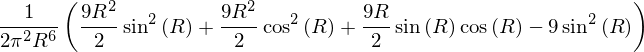

In [63]:
sigma(W,0,2,0,1)

(3*R**2*sin(R)**2/2 + 3*R**2*cos(R)**2/2 + 9*R*sin(R)*cos(R)/2 - 9*sin(R)**2/4 + 45*cos(R)**2/4 - 45*sin(R)*cos(R)/(4*R))/(2*pi**2*R**6)


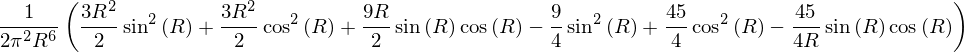

In [51]:
sigma(W,1,2)

## SharpK

In this case, we have 

$$ W(kR) = \begin{cases} 1 & kR \geq 1 \\ 0 & kR < 1 \end{cases}. $$

This renders the solution very simple:

$$ \sigma^2(R) = \frac{1}{2\pi^2} \int_0^{1/R} k^{2(1+n)} k^p = \frac{1}{2\pi^2}\frac{1}{tR^t}, $$

where $t = 2(1+n) + p + 1$.

And

$$ \frac{d\ln \sigma^2}{d\ln r} = \frac{-1}{2\pi^2 \sigma^2 R^{3+p}}. $$ 

## Gaussian

In this case we have 

$$ W(x=kR) = \exp(-x^2/2). $$

In [122]:
W = exp(-x**2/2)

3/(16*pi**(3/2)*R**5)


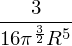

In [104]:
sigma(W,0,2,0,oo)

15/(32*pi**(3/2)*R**7)


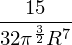

In [91]:
sigma(W,1,2,0,oo)

In [124]:
dlnss_dlnr(W,2,0,oo)

3/(16*pi**(3/2)*R**5)
-5
